In [35]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [36]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [49]:
x_train.shape

(50000, 32, 32, 3)

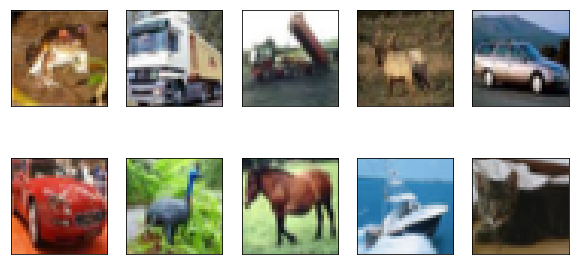

In [38]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    
    

In [39]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [40]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## MLPs

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               307300    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
             metrics=['accuracy'])

In [46]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='Cifar10_MLP.hdf5',
                              verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
                 validation_split=0.2, verbose=1, shuffle=True,
                callbacks=[checkpointer])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 5s 135us/step - loss: 2.1471 - acc: 0.1952 - val_loss: 2.0068 - val_acc: 0.2706

Epoch 00001: val_loss improved from inf to 2.00677, saving model to Cifar10_MLP.hdf5
Epoch 2/20
40000/40000 [==============================] - 5s 127us/step - loss: 1.9975 - acc: 0.2501 - val_loss: 1.8929 - val_acc: 0.3042

Epoch 00002: val_loss improved from 2.00677 to 1.89293, saving model to Cifar10_MLP.hdf5
Epoch 3/20
40000/40000 [==============================] - 5s 129us/step - loss: 1.9545 - acc: 0.2726 - val_loss: 1.9311 - val_acc: 0.2866

Epoch 00003: val_loss did not improve from 1.89293
Epoch 4/20
40000/40000 [==============================] - 5s 131us/step - loss: 1.9243 - acc: 0.2871 - val_loss: 1.9010 - val_acc: 0.3060

Epoch 00004: val_loss did not improve from 1.89293
Epoch 5/20
40000/40000 [==============================] - 5s 129us/step - loss: 1.8982 - acc: 0.2999 - val_loss: 1.829

In [47]:
model.load_weights('Cifar10_MLP.hdf5')

In [48]:
score = model.evaluate(x_test, y_test)
print(score)

10000/10000 [==============================] - 1s 114us/step
[1.734929083442688, 0.3818]


## CNNs

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same',
                activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same',
                activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', 
                activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
__________

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
             metrics=['accuracy'])

In [57]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='Cifar10_CNN.hdf5',
                               verbose=1,
                              save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
                validation_split=0.2, callbacks=[checkpointer],
                shuffle=True, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 43s 1ms/step - loss: 1.8722 - acc: 0.3093 - val_loss: 1.6469 - val_acc: 0.4084

Epoch 00001: val_loss improved from inf to 1.64688, saving model to Cifar10_CNN.hdf5
Epoch 2/20
40000/40000 [==============================] - 44s 1ms/step - loss: 1.5642 - acc: 0.4336 - val_loss: 1.6186 - val_acc: 0.4072

Epoch 00002: val_loss improved from 1.64688 to 1.61864, saving model to Cifar10_CNN.hdf5
Epoch 3/20
40000/40000 [==============================] - 50s 1ms/step - loss: 1.4203 - acc: 0.4879 - val_loss: 1.3500 - val_acc: 0.5165

Epoch 00003: val_loss improved from 1.61864 to 1.35003, saving model to Cifar10_CNN.hdf5
Epoch 4/20
40000/40000 [==============================] - 43s 1ms/step - loss: 1.3181 - acc: 0.5263 - val_loss: 1.2844 - val_acc: 0.5417

Epoch 00004: val_loss improved from 1.35003 to 1.28445, saving model to Cifar10_CNN.hdf5
Epoch 5/20
40000/40000 [======================

In [58]:
model.load_weights('Cifar10_CNN.hdf5')

In [59]:
score = model.evaluate(x_test, y_test)
print(score)

10000/10000 [==============================] - 5s 466us/step
[0.9067403419494628, 0.6856]
